In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!pip install kneed

In [9]:
path="/content/drive/MyDrive/Machine Learning/Project/DATA_2_mall_customer.csv"
# df=pd.read_csv(path)
dataset = pd.read_csv(path,encoding='cp1252')

## Load Dataset

In [10]:
# load dataset and show the first five sample
# dataset = pd.read_csv(url, encoding= 'unicode_escape')
#Load dataset yang akan dipakai
mall_df = pd.DataFrame({'InvoiceNo': dataset['InvoiceNo'], 'Quantity': dataset['Quantity'], 'UnitPrice': dataset['UnitPrice'], 'Country': dataset['Country']})
mall_df.head(100)

,InvoiceNo,Quantity,UnitPrice,Country
0,536365,6,2.55,United Kingdom
1,536365,6,3.39,United Kingdom
2,536365,8,2.75,United Kingdom
3,536365,6,3.39,United Kingdom
4,536365,6,3.39,United Kingdom
...,...,...,...,...
95,536378,6,2.55,United Kingdom
96,536378,120,0.42,United Kingdom
97,536378,24,0.55,United Kingdom
98,536378,24,0.55,United Kingdom


In [11]:
#Mengelompokan berdasarkan InvoiceNo
mall_df = mall_df.groupby(['InvoiceNo'], as_index=False).sum()
mall_df

,InvoiceNo,Quantity,UnitPrice
0,536365,40,27.37
1,536366,12,3.70
2,536367,83,58.24
3,536368,15,19.10
4,536369,3,5.95
...,...,...,...
25895,C581484,-80995,2.08
25896,C581490,-23,2.78
25897,C581499,-1,224.69
25898,C581568,-5,10.95


In [12]:
#Menghapus data di unitpirce dan quantity dibawah 0 atau(-)
mall_df = mall_df.drop(labels=mall_df.loc[mall_df['UnitPrice'] <= 0].index.values.tolist(), axis=0)

mall_df = mall_df.drop(labels=mall_df.loc[mall_df['Quantity'] <= 0].index.values.tolist(), axis=0)

In [13]:
mall_df

,InvoiceNo,Quantity,UnitPrice
0,536365,40,27.37
1,536366,12,3.70
2,536367,83,58.24
3,536368,15,19.10
4,536369,3,5.95
...,...,...,...
22057,581584,120,2.57
22058,581585,278,37.78
22059,581586,66,20.23
22060,581587,105,44.50


In [14]:
# describe data
mall_df.describe()

,Quantity,UnitPrice
count,19960.000000,19960.000000
mean,280.080110,103.779949
std,955.351599,311.919735
min,1.000000,0.060000
25%,70.000000,18.337500
50%,151.000000,45.425000
75%,296.000000,90.182500
max,80995.000000,13541.330000


In [15]:
#Mengurangi Outlier dengan mengambil data berdasarkan mean+standar deviasi
mall_df = mall_df.drop(labels=mall_df.loc[mall_df['Quantity'] >= (mall_df['Quantity'].mean() + mall_df['Quantity'].std())].index.values.tolist(), axis=0)

mall_df = mall_df.drop(labels=mall_df.loc[mall_df['UnitPrice'] >= (mall_df['UnitPrice'].mean() + mall_df['UnitPrice'].std())].index.values.tolist(), axis=0)

In [16]:
mall_df.describe()

,Quantity,UnitPrice
count,18723.000000,18723.000000
mean,200.854617,59.678719
std,197.127893,58.234972
min,1.000000,0.060000
25%,66.000000,17.465000
50%,144.000000,42.740000
75%,267.000000,81.930000
max,1232.000000,352.960000


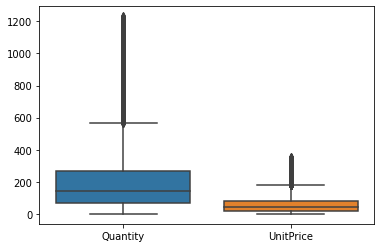

In [17]:
# Check outliers
sns.boxplot(data=mall_df)

In [18]:
mall_df.describe()

,Quantity,UnitPrice
count,18723.000000,18723.000000
mean,200.854617,59.678719
std,197.127893,58.234972
min,1.000000,0.060000
25%,66.000000,17.465000
50%,144.000000,42.740000
75%,267.000000,81.930000
max,1232.000000,352.960000


## Data Preprocessing

In [19]:
# Data frame baru yang berisi 2 kolum untuk dikluster(qunatity dan unitprice)
customer_df = pd.DataFrame(mall_df[['Quantity', 'UnitPrice']])
customer_df.head()

,Quantity,UnitPrice
0,40,27.37
1,12,3.70
2,83,58.24
3,15,19.10
4,3,5.95


Before we analyze our data, we need to scale the data with standardization method

In [20]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(customer_df), columns = ['Quantity', 'UnitPrice'])

scaled_df.head()

,Quantity,UnitPrice
0,-0.816013,-0.554814
1,-0.958057,-0.961282
2,-0.597875,-0.024706
3,-0.942838,-0.696829
4,-1.003713,-0.922644


In [21]:
# Scaled data di describe
scaled_df.describe()

,Quantity,UnitPrice
count,1.872300e+04,1.872300e+04
mean,9.737503e-17,5.960859e-17
std,1.000027e+00,1.000027e+00
min,-1.013859e+00,-1.023789e+00
25%,-6.841154e-01,-7.249054e-01
50%,-2.884226e-01,-2.908763e-01
75%,3.355545e-01,3.821050e-01
max,5.230984e+00,5.036306e+00


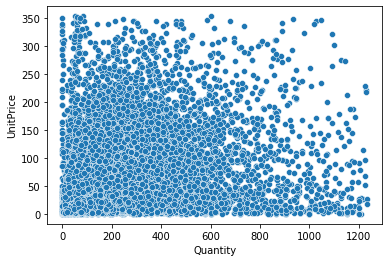

In [22]:
# NORMAL
import seaborn as sns

sns.scatterplot(data = customer_df, x='Quantity', y='UnitPrice')

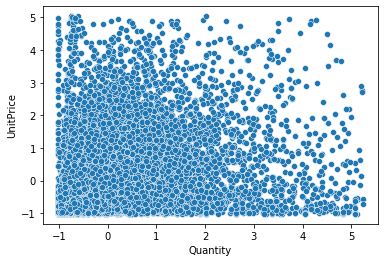

In [23]:
# STANDARIZED
import seaborn as sns

sns.scatterplot(data = scaled_df, x='Quantity', y='UnitPrice')

## Clustering

### 1. Agglomerative Algorithm

In [24]:
# assign the cluster for each sample in the dataset
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agglo.fit_predict(scaled_df)

array([0, 0, 0, ..., 0, 0, 0])

Text(0, 0.5, 'UnitPrice')

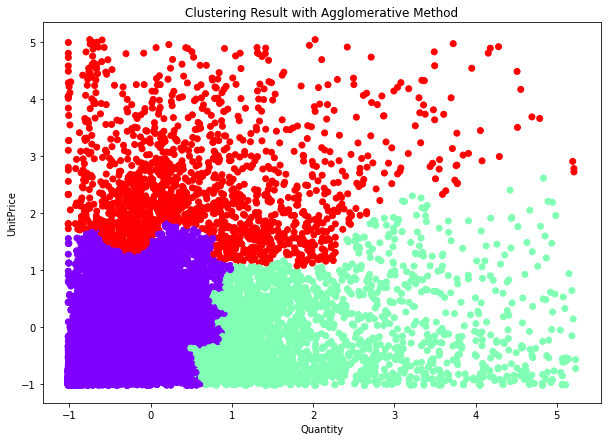

In [25]:
# Visualize clustering result with scatter plot
plt.figure(figsize=(10,7))
plt.title("Clustering Result with Agglomerative Method")
plt.scatter(scaled_df.iloc[:,0], scaled_df.iloc[:,1], c=agglo.labels_, cmap='rainbow')
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")

In [26]:
# create data frame with label
agglo_lb = pd.DataFrame(agglo.fit_predict(scaled_df), columns=['label'])
agglo_df = pd.concat([customer_df, agglo_lb], axis=1)
agglo_df.head()

,Quantity,UnitPrice,label
0,40.0,27.37,0.0
1,12.0,3.70,0.0
2,83.0,58.24,0.0
3,15.0,19.10,0.0
4,3.0,5.95,0.0


### 2. K-Means Algorithm

In [27]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(init="random", n_clusters=3, max_iter=300, random_state=42)
kmeans.fit_predict(scaled_df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Text(0, 0.5, 'UnitPrice')

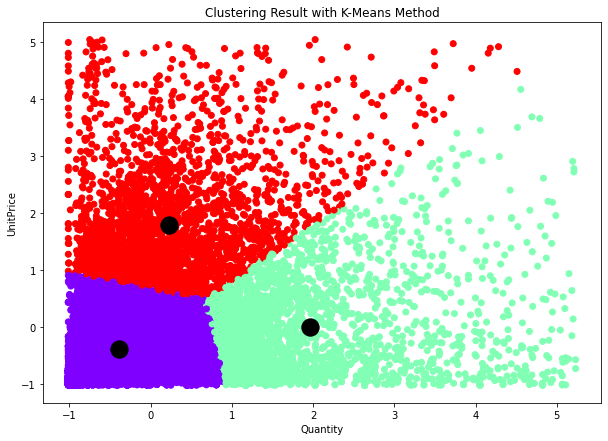

In [28]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))
plt.title("Clustering Result with K-Means Method")
plt.scatter(scaled_df.iloc[:,0], scaled_df.iloc[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='black')
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")

EVALUATION METHOD

1. using elbow method

In [29]:
# set the parameter for evaluating K
kmeans_params = { "init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

# check the inertia for each K
SSE = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_params)
  kmeans.fit(scaled_df)
  SSE.append(kmeans.inertia_)

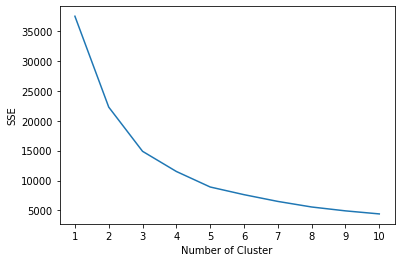

In [30]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

In [31]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
findknee = KneeLocator(range(1,11), SSE, curve="convex", direction="decreasing")
print('the best k for your model is ', findknee.elbow)

the best k for your model is  3


2. Using silhouette score

In [32]:
# using silhouette score to evaluate clustering number
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_params)
  kmeans.fit(scaled_df)
  score = silhouette_score(scaled_df, kmeans.labels_)
  silhouette_coefficients.append(score)

Text(0, 0.5, 'Silhouette Coefficient')

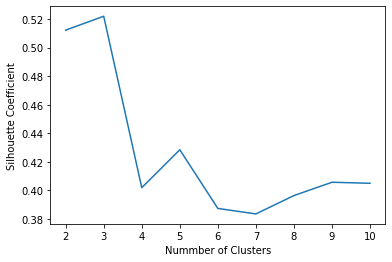

In [33]:
# manually visualize the score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Nummber of Clusters")
plt.ylabel("Silhouette Coefficient")

Visualize our dataset based on your new features and its centroid

In [34]:
kmeans = KMeans(n_clusters=3, **kmeans_params)
kmeans.fit_predict(scaled_df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Text(0, 0.5, 'UnitPrice')

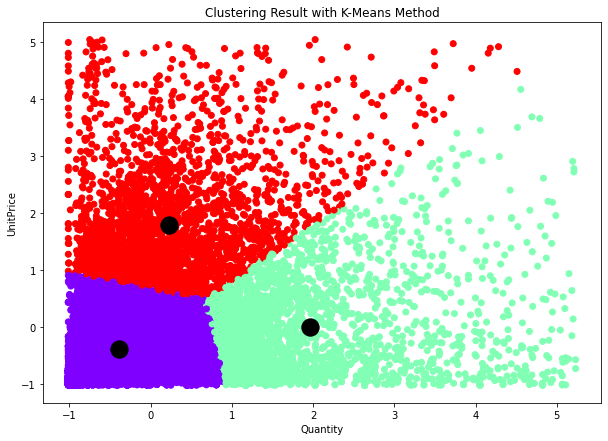

In [35]:
plt.figure(figsize=(10,7))
plt.title("Clustering Result with K-Means Method")
plt.scatter(scaled_df.iloc[:,0], scaled_df.iloc[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='black')
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")

Create a new dataframe, so that we can see in which  group each country belongs to

In [36]:
#create label as dataframe
label_df = pd.DataFrame(kmeans.fit_predict(scaled_df), columns=['label'])
label_df.head()
label_df.describe()

,label
count,18723.000000
mean,0.438445
std,0.747242
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [37]:
customer_df.describe()
# customer_df = customer_df.reset_index(drop=True)
# customer_df.head()

,Quantity,UnitPrice
count,18723.000000,18723.000000
mean,200.854617,59.678719
std,197.127893,58.234972
min,1.000000,0.060000
25%,66.000000,17.465000
50%,144.000000,42.740000
75%,267.000000,81.930000
max,1232.000000,352.960000


In [38]:
#merge original dataset with the label
final_df = pd.concat([customer_df, label_df], axis = 1)
# final_df.dropna(inplace=True)
# final_df.head()
final_df.describe()

,Quantity,UnitPrice,label
count,18723.000000,18723.000000,18723.000000
mean,200.854617,59.678719,0.438445
std,197.127893,58.234972,0.747242
min,1.000000,0.060000,0.000000
25%,66.000000,17.465000,0.000000
50%,144.000000,42.740000,0.000000
75%,267.000000,81.930000,1.000000
max,1232.000000,352.960000,2.000000


In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21670 entries, 0 to 22060
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quantity   18723 non-null  float64
 1   UnitPrice  18723 non-null  float64
 2   label      18723 non-null  float64
dtypes: float64(3)
memory usage: 677.2 KB


In [40]:
cluster1 = final_df.loc[final_df['label'] == 0.0]
cluster1.describe()

final_df.loc[final_df['label'] == 0.0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13436 entries, 0 to 18722
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quantity   11287 non-null  float64
 1   UnitPrice  11287 non-null  float64
 2   label      13436 non-null  float64
dtypes: float64(3)
memory usage: 419.9 KB


In [41]:
cluster2 = final_df.loc[final_df['label'] == 1.0]
cluster2.describe()


final_df.loc[final_df['label'] == 1.0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2365 entries, 5 to 18714
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quantity   2003 non-null   float64
 1   UnitPrice  2003 non-null   float64
 2   label      2365 non-null   float64
dtypes: float64(3)
memory usage: 73.9 KB


In [42]:
cluster3 = final_df.loc[final_df['label'] == 2.0]
cluster3.describe()
final_df.loc[final_df['label'] == 2.0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2922 entries, 22 to 18706
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quantity   2486 non-null   float64
 1   UnitPrice  2486 non-null   float64
 2   label      2922 non-null   float64
dtypes: float64(3)
memory usage: 91.3 KB


In [43]:
#check
13436 + 2365 + 2922

18723